In [9]:
import os
import re
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, f_oneway
from sklearn.decomposition import PCA

# Set the directory where the prediction files are stored
results_dir = "../../../LABS/ABLATION_SHARED/test_all*.csv"
combos_dir = "../../../LABS/ABLATION_SHARED/*combinations.csv"
files = glob.glob(results_dir)
combos_file = glob.glob(combos_dir)[0]
print(f"Found {len(files)} prediction files.")
params_df = pd.read_csv(combos_file)

Found 704 prediction files.


In [10]:
params_df.columns

Index(['id', 'path', 'shared_latent_dim', 'hidden_dim', 'n_embedding_dim',
       'fidelity_embedding_dim'],
      dtype='object')

In [19]:
def get_params(id, params_df):
    return params_df[params_df["id"] == id].iloc[0]

def get_data(id, params_df=params_df, all_paths=files):
    file_path = [f for f in all_paths if f"all_{id}.csv" in f][0]
    data = pd.read_csv(file_path)
    return data, get_params(id, params_df)

def get_mape_eb(df):
    y_true = df["true_Eb"]
    y_pred = df["pred_Eb"]
    unc_pred = df["unc_Eb"]

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def get_mape_rc(df):
    y_true = df["true_Rch"]
    y_pred = df["pred_Rch"]
    unc_pred = df["unc_Rch"]

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def get_mape(df):
    mape_eb = get_mape_eb(df)
    mape_rc = get_mape_rc(df)
    return (mape_eb + mape_rc) / 2

In [21]:
_data = {"id": [], "mape_eb": [], "mape_rc": [], "shared_latent_dim": [], "hidden_dim": [], "n_embedding_dim": [], "fidelity_embedding_dim": [], "total_mape": []}
for id in params_df.id.unique():
    data, params = get_data(id)
    _data["id"].append(id)
    _data["mape_eb"].append(get_mape_eb(data))
    _data["mape_rc"].append(get_mape_rc(data))
    _data["total_mape"].append(get_mape(data))
    _data["shared_latent_dim"].append(params["shared_latent_dim"])
    _data["hidden_dim"].append(params["hidden_dim"])
    _data["n_embedding_dim"].append(params["n_embedding_dim"])
    _data["fidelity_embedding_dim"].append(params["fidelity_embedding_dim"])
results_df = pd.DataFrame(_data)


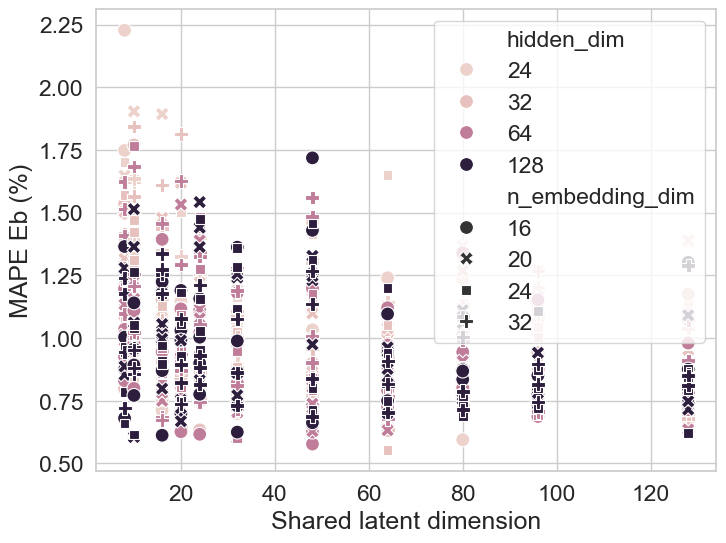

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(data=results_df, x="shared_latent_dim", y="mape_eb", ax=ax, hue="hidden_dim", style="n_embedding_dim", s=100)
ax.set_xlabel("Shared latent dimension")
ax.set_ylabel("MAPE Eb (%)")
plt.show()


<Axes: xlabel='shared_latent_dim', ylabel='mape_eb'>

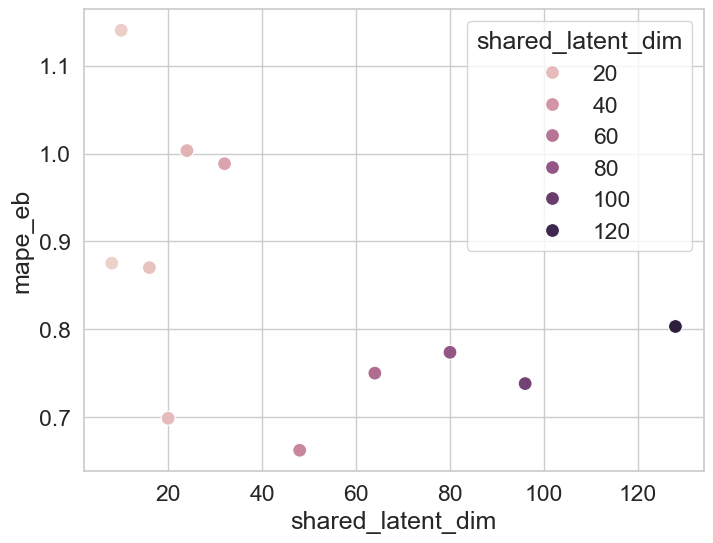

In [23]:
# Fix the number of n_embedding_dim=16 and hidden_dim=128 and fidelity_embedding_dim=2
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(data=results_df[(results_df["n_embedding_dim"] == 16) & (results_df["hidden_dim"] == 128) & (results_df["fidelity_embedding_dim"] == 2)], x="shared_latent_dim", y="mape_eb", ax=ax, hue="shared_latent_dim", s=100)


In [31]:
best_model = results_df.iloc[results_df["mape_rc"].idxmin()]
best_model_id = best_model["id"]
best_model_params = get_params(best_model_id, params_df)
best_model_params

id                                                                      180
path                      /work/submit/josemm/WORKS/Theory/BANANNE/LABS/...
shared_latent_dim                                                        16
hidden_dim                                                              128
n_embedding_dim                                                          16
fidelity_embedding_dim                                                   16
Name: 179, dtype: object